In [44]:
# Importing all the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read in the data
df = pd.read_csv('D:\Portfolio Projects\Python Correlation Project\movies.csv')


In [45]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [ ]:
#this can be used to see all the rows
pd.set_option('display.max_rows', None)


In [55]:
#taking a look at the null data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [56]:
#removing all the null data columns for better comparison
df = df.dropna()

In [59]:
#no null data remaining
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [62]:
#splitting the released date to get the year 
df[['year','other']] = df['released'].str.split('(',n = 1,expand = True)
df['year'] = df['year'].str[-5:]
df.drop(columns = 'other')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,other
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,United States)
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,United States)
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,United States)
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,United States)


In [ ]:
#alternative to the previous method
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [63]:
#taking a look at the overall statistical informations
df.describe()

,score,votes,budget,gross,runtime
count,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [64]:
#unique values
df.nunique()

name        5336
rating        10
genre         15
year          41
released    2560
score         72
votes        717
director    2063
writer      3205
star        1845
country       50
budget       398
gross       5418
company     1475
runtime      127
other         48
dtype: int64

In [67]:
#the data types of each columns
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
other        object
dtype: object

In [68]:
#converting the float to integer so it is convenient
df['votes'] =df['votes'].astype('int64')
df['budget'] =df['budget'].astype('int64')
df['gross'] =df['gross'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year         object
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
other        object
dtype: object

In [69]:
#taking a look at the data by sorting it
df.sort_values(by = 'gross',ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,other
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States)
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States)
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States)
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States)
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,Sweden)
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,South Korea)
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,Canada)
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,United States)


In [70]:
#removing all the duplicates in the dataframe
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,other
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States)
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States)
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States)
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States)
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,Sweden)
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,South Korea)
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,Canada)
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,United States)


In [71]:
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

In [73]:
#Correlation
df.corr(numeric_only= True)

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


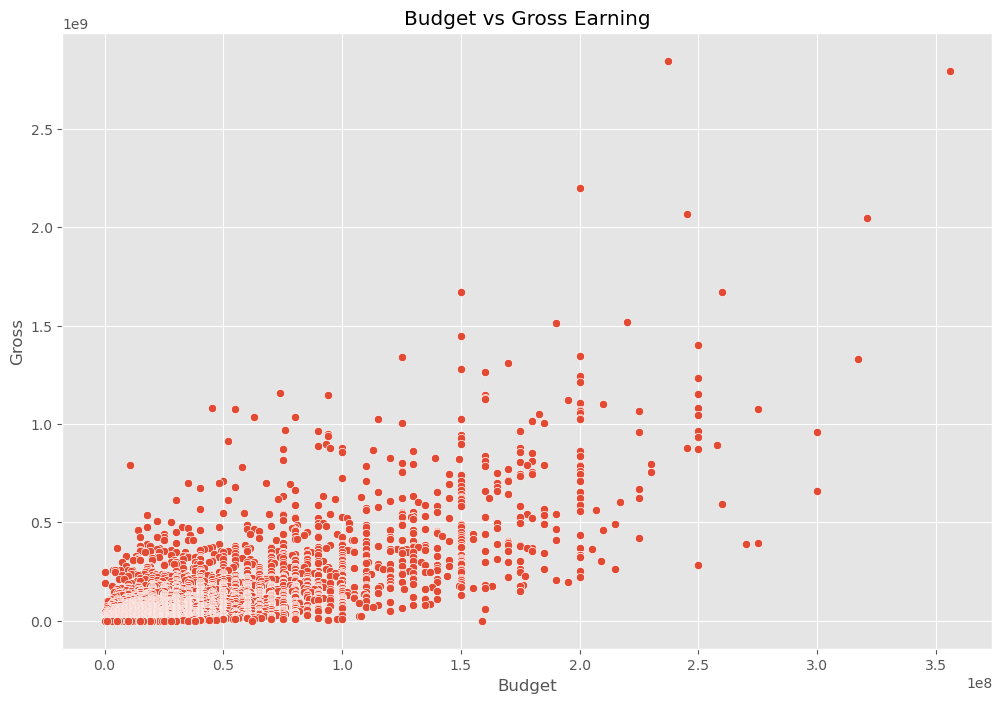

In [75]:
#Scatterplot to take a look at budget vs gross earning
sns.scatterplot(x = 'budget', y = 'gross',data = df,);
plt.title('Budget vs Gross Earning');
plt.ylabel('Gross');
plt.xlabel('Budget');



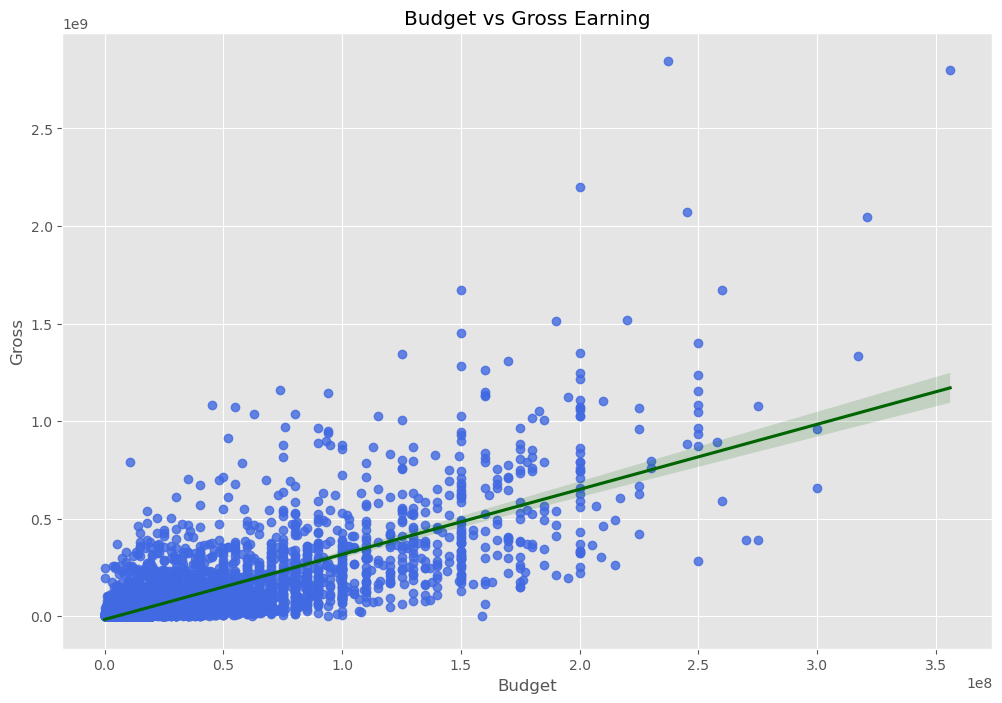

In [83]:
#Regression line  to take a look at budget vs gross earning
sns.regplot(x = 'budget', y = 'gross',data = df,scatter_kws={'color':'royalblue'},line_kws={'color':'darkgreen'});
plt.title('Budget vs Gross Earning');
plt.ylabel('Gross');
plt.xlabel('Budget');



In [88]:
#Pearson method
corr_matrix_p = df.corr(numeric_only= True,method = 'pearson')
corr_matrix_p

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [89]:
#Kendall method
corr_matrix_k = df.corr(numeric_only= True,method = 'kendall')
corr_matrix_k

,score,votes,budget,gross,runtime
score,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.350185,1.000000,0.346274,0.553625,0.205344
budget,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.292254,0.205344,0.231278,0.176979,1.000000


In [90]:
#Spearman method
corr_matrix_s = df.corr(numeric_only= True,method = 'spearman')
corr_matrix_s

,score,votes,budget,gross,runtime
score,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.495409,1.000000,0.493461,0.745793,0.300621
budget,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.412155,0.300621,0.330794,0.257400,1.000000


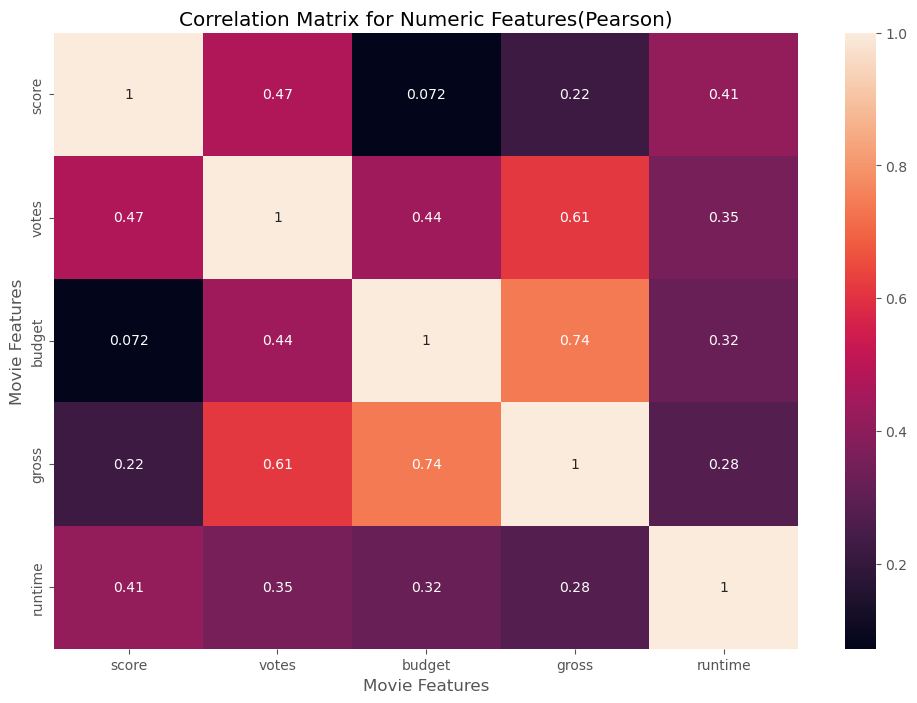

In [95]:
sns.heatmap(corr_matrix_p,annot = True);
plt.title('Correlation Matrix for Numeric Features(Pearson)');
plt.ylabel('Movie Features');
plt.xlabel('Movie Features');


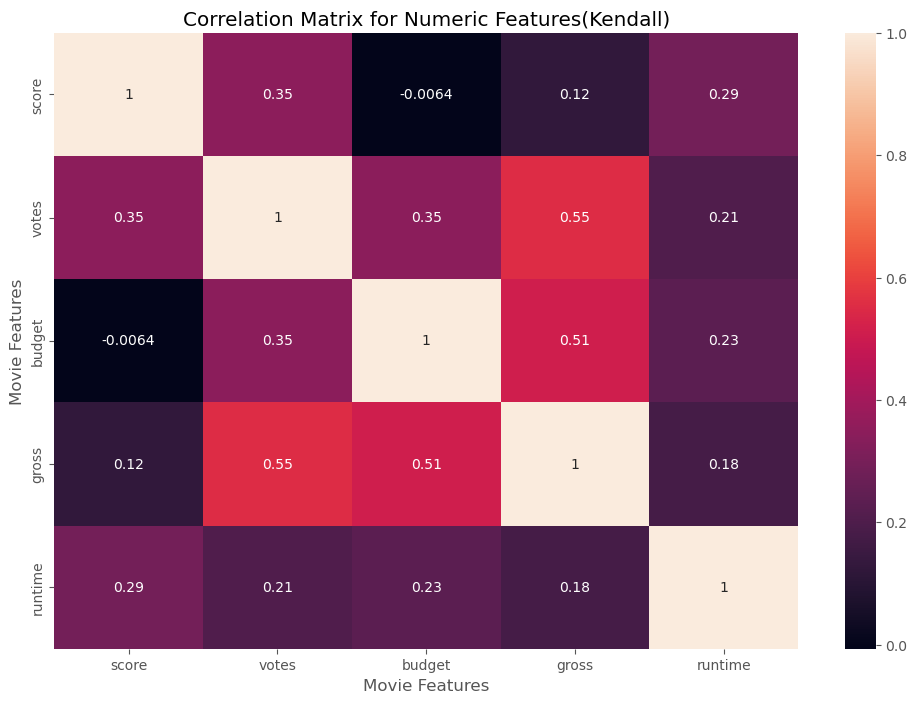

In [96]:
sns.heatmap(corr_matrix_k,annot = True);
plt.title('Correlation Matrix for Numeric Features(Kendall)');
plt.ylabel('Movie Features');
plt.xlabel('Movie Features');


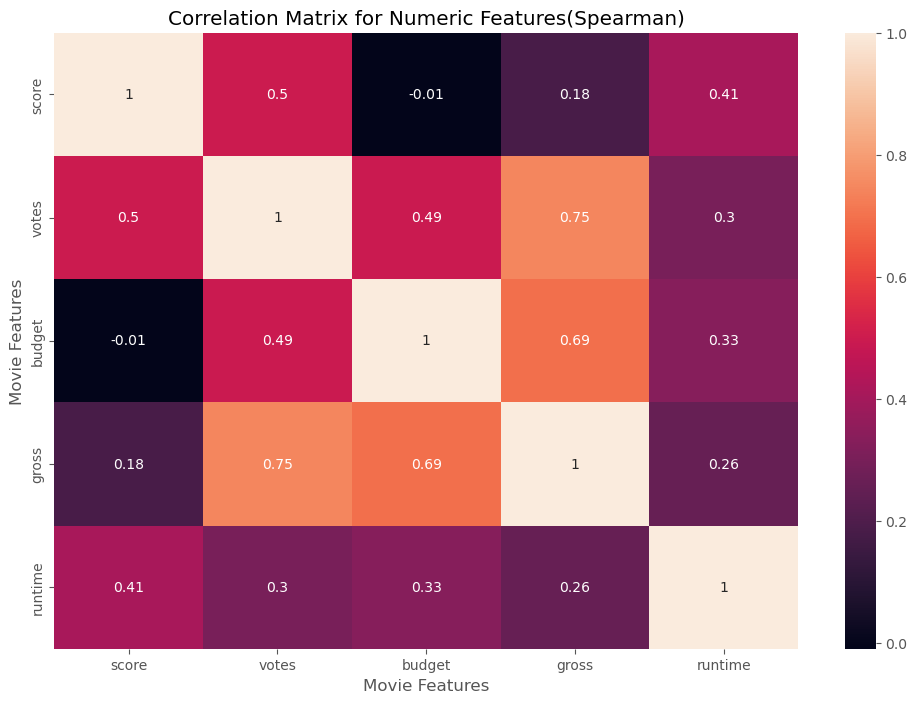

In [97]:
sns.heatmap(corr_matrix_s,annot = True)
plt.title('Correlation Matrix for Numeric Features(Spearman)');
plt.ylabel('Movie Features');
plt.xlabel('Movie Features');


In [102]:
df['year'] = df['year'].astype('int64')

In [103]:
df_convtonum = df.copy()

for col in df_convtonum.columns:
    if df_convtonum[col].dtype == 'object':
        df_convtonum[col] = df_convtonum[col].astype('category')
        df_convtonum[col] = df_convtonum[col].cat.codes
        
df_convtonum

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,other
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,47
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,47
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,47
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,47
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2015,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,41
2434,2969,5,0,1994,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,39
3681,1595,3,6,2001,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,8
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85.0,47


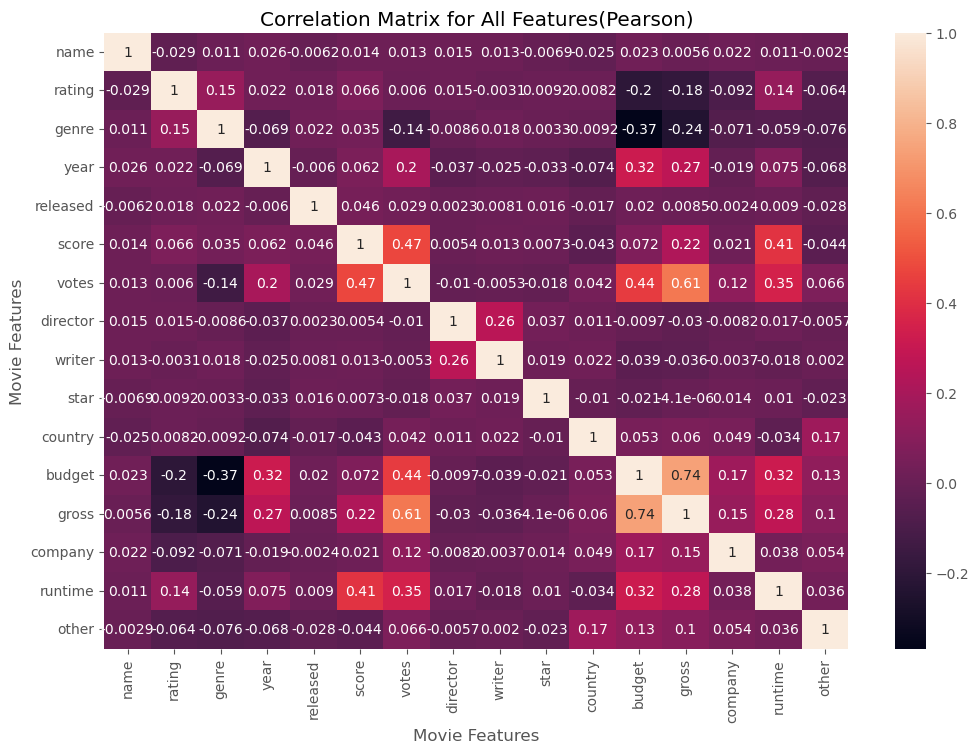

In [109]:
corr_mat_p = df_convtonum.corr(numeric_only= True,method = 'pearson')
sns.heatmap(corr_mat_p,annot = True);
plt.title('Correlation Matrix for All Features(Pearson)');
plt.ylabel('Movie Features');
plt.xlabel('Movie Features');


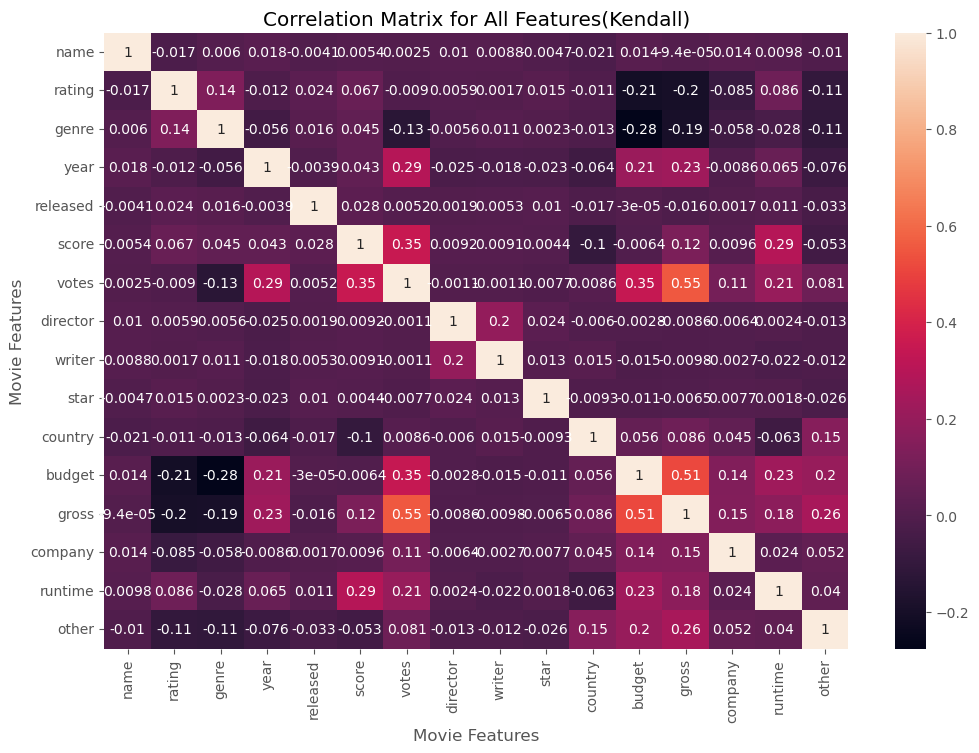

In [110]:
corr_mat_p = df_convtonum.corr(numeric_only= True,method = 'kendall')
sns.heatmap(corr_mat_p,annot = True);
plt.title('Correlation Matrix for All Features(Kendall)');
plt.ylabel('Movie Features');
plt.xlabel('Movie Features');


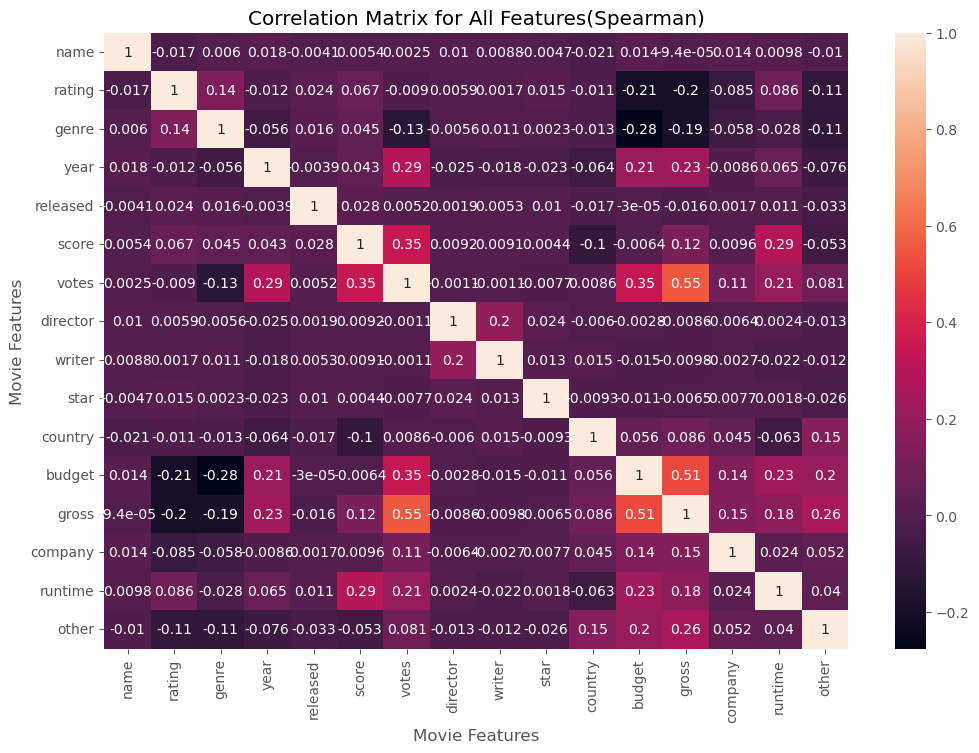

In [111]:
corr_mat_s = df_convtonum.corr(numeric_only= True,method = 'spearman')
sns.heatmap(corr_mat_p,annot = True);
plt.title('Correlation Matrix for All Features(Spearman)');
plt.ylabel('Movie Features');
plt.xlabel('Movie Features');


In [112]:
#converting all the columns to number
corr_mat_p = df_convtonum.corr(numeric_only= True,method = 'pearson')
corr_mat_p.unstack()

name   name        1.000000
       rating     -0.029234
       genre       0.010996
       year        0.025542
       released   -0.006152
                     ...   
other  budget      0.126976
       gross       0.100029
       company     0.054484
       runtime     0.036272
       other       1.000000
Length: 256, dtype: float64

In [113]:
corr_mat_k = df_convtonum.corr(numeric_only= True,method = 'kendall')
corr_mat_k.unstack()

name   name        1.000000
       rating     -0.017023
       genre       0.005970
       year        0.018488
       released   -0.004104
                     ...   
other  budget      0.204724
       gross       0.256763
       company     0.052382
       runtime     0.039852
       other       1.000000
Length: 256, dtype: float64

In [114]:
corr_mat_s = df_convtonum.corr(numeric_only= True,method = 'spearman')
corr_mat_s.unstack()

name   name        1.000000
       rating     -0.021980
       genre       0.008213
       year        0.027590
       released   -0.006341
                     ...   
other  budget      0.252453
       gross       0.318852
       company     0.064535
       runtime     0.049128
       other       1.000000
Length: 256, dtype: float64

In [118]:
pairs_p = corr_mat_p.unstack().sort_values()
pairs_p

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
rating   budget    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
other    other      1.000000
Length: 256, dtype: float64

In [119]:
pairs_k = corr_mat_k.unstack().sort_values()
pairs_k

genre    budget    -0.275983
budget   genre     -0.275983
rating   budget    -0.208389
budget   rating    -0.208389
gross    rating    -0.198863
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
other    other      1.000000
Length: 256, dtype: float64

In [120]:
pairs_s = corr_mat_s.unstack().sort_values()
pairs_s

genre    budget    -0.372729
budget   genre     -0.372729
genre    gross     -0.268314
gross    genre     -0.268314
rating   budget    -0.267486
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
other    other      1.000000
Length: 256, dtype: float64

In [126]:
#High correlation
high_corr_p = pairs_p[(pairs_p > 0.5) & (pairs_p < 1.0) ]
high_corr_p

votes   gross     0.614751
gross   votes     0.614751
        budget    0.740247
budget  gross     0.740247
dtype: float64

In [127]:
high_corr_k = pairs_k[(pairs_k > 0.5) & (pairs_k < 1.0) ]
high_corr_k

gross   budget    0.512057
budget  gross     0.512057
votes   gross     0.553625
gross   votes     0.553625
dtype: float64

In [128]:
high_corr_s = pairs_s[(pairs_s > 0.5) & (pairs_s < 1.0) ]
high_corr_s

gross   budget    0.692958
budget  gross     0.692958
gross   votes     0.745793
votes   gross     0.745793
dtype: float64